# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

Import Data and Runnning Basic EDA

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [1]:
#importing data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Data loading
data_hc_frame = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
data_kmeans_frame = pd.read_csv('bank_marketing_part1_Data.csv')

In [4]:
data_hc_frame.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
data_kmeans_frame.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [6]:
data_hc_frame.shape 

(210, 7)

In [7]:
data_kmeans_frame.shape

(210, 7)

In [8]:
data_hc_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [9]:
data_hc_frame.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [10]:
#duplicates check
print("Number of Duplicate rows in the Dataset:",data_hc_frame.duplicated().sum())

Number of Duplicate rows in the Dataset: 0


In [11]:
#null values check
data_hc_frame.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [12]:
#skewness check
skew = data_hc_frame.skew() 
print("Skewness of the Dataset:\n",skew)

Skewness of the Dataset:
 spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64


In [13]:
print("Variance of the Dataset:\n",data_hc_frame.var())

Variance of the Dataset:
 spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64


In [14]:
Coeff_of_Var = data_hc_frame.std()/data_hc_frame.mean()
print("Coefficient of Variation of the Dataset:\n",Coeff_of_Var)

Coefficient of Variation of the Dataset:
 spending                        0.195972
advance_payments                0.089699
probability_of_full_payment     0.027129
current_balance                 0.078717
credit_limit                    0.115913
min_payment_amt                 0.406345
max_spent_in_single_shopping    0.090879
dtype: float64


In [15]:
#covariance check
data_hc_frame.cov()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133
advance_payments,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753
probability_of_full_payment,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634
current_balance,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125
credit_limit,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068
min_payment_amt,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187
max_spent_in_single_shopping,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553


In [16]:
#correlation check
data_hc_frame.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


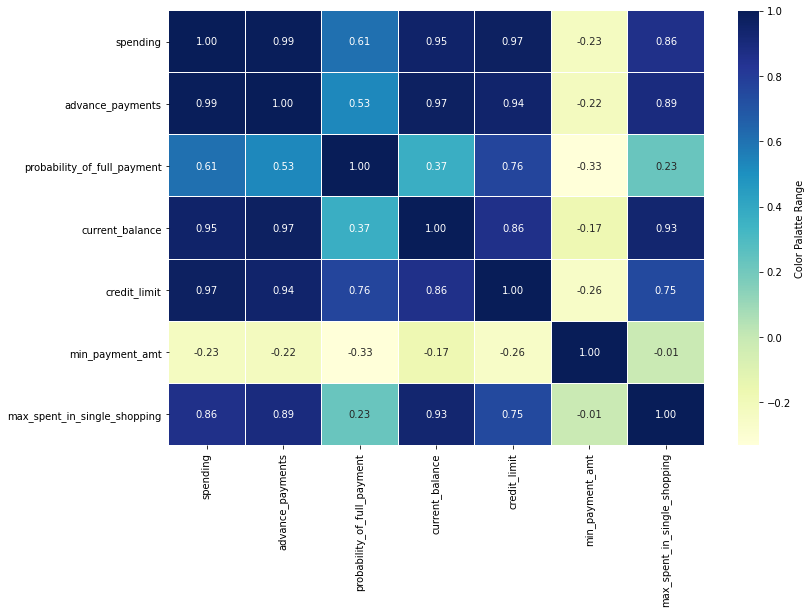

In [17]:
#heatmap creation
fig,ax = plt.subplots(figsize=(12,8))   
sns.heatmap(data_hc_frame.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="YlGnBu",cbar_kws={'label': 'Color Palatte Range'}) # the color intensity is based on 
plt.show()

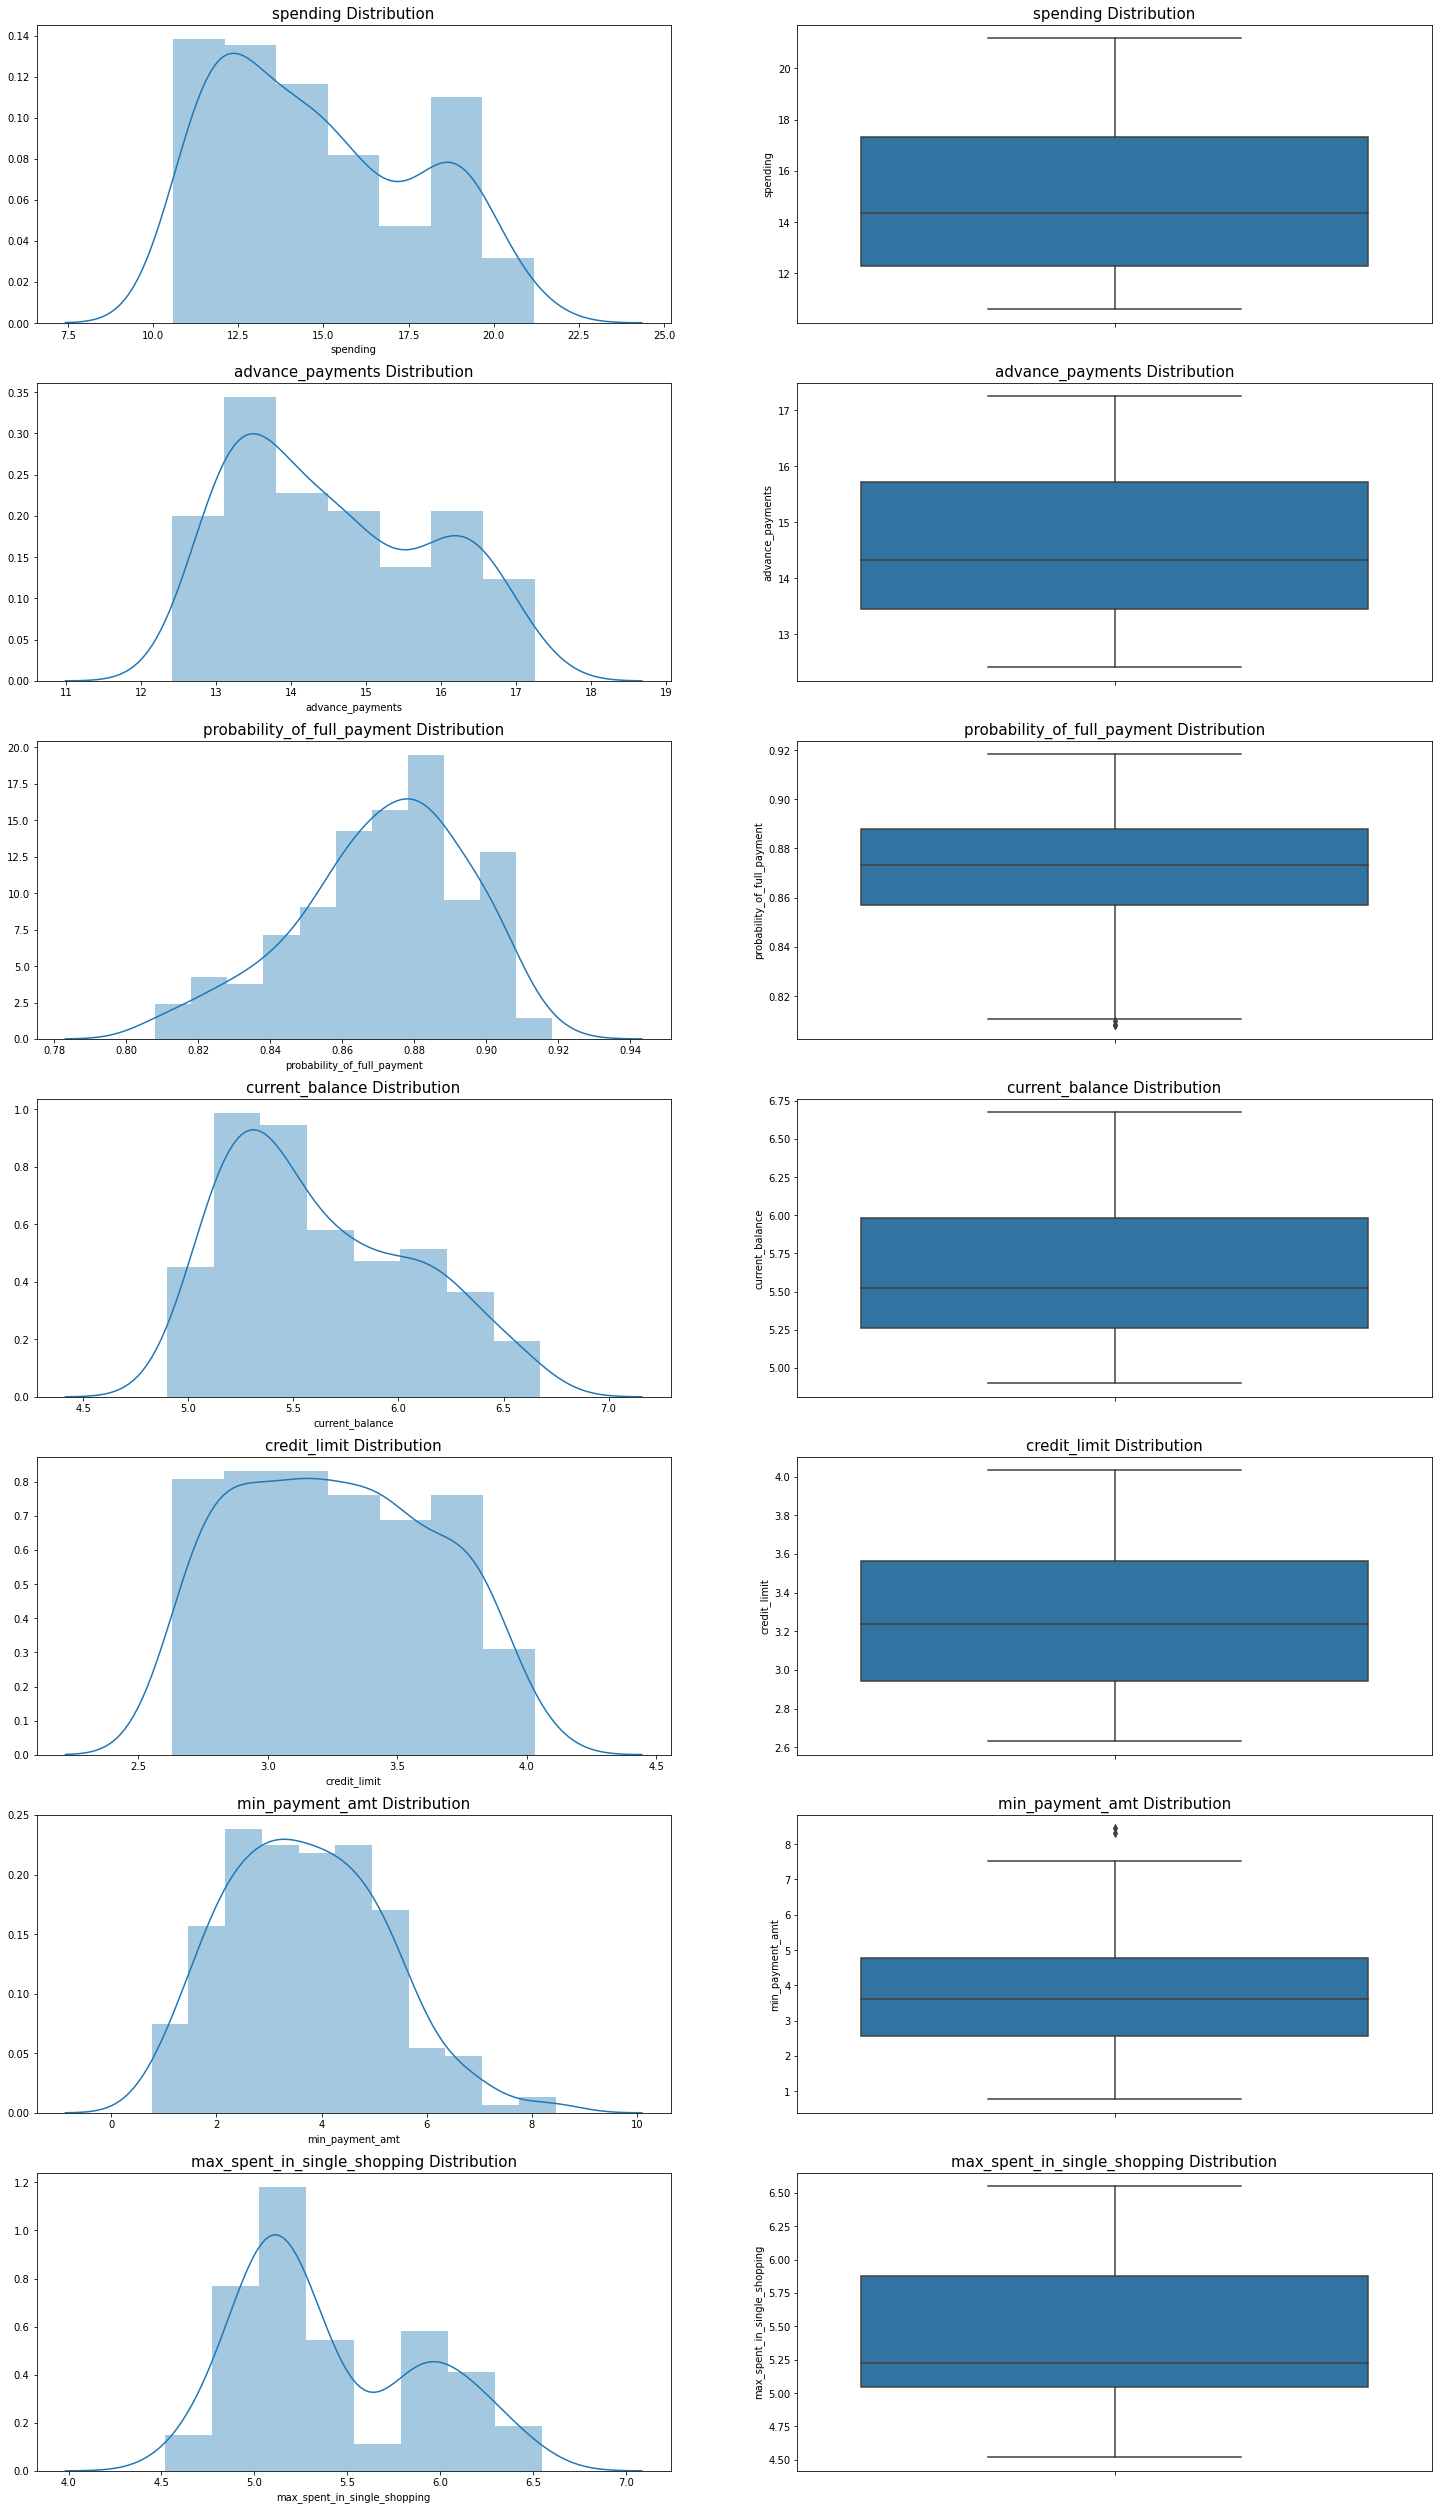

In [18]:
#univariate analysis
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25, 45)

a = sns.distplot(data_hc_frame['spending'] , ax=axes[0][0])
a.set_title("spending Distribution",fontsize=15)
a = sns.boxplot(data_hc_frame['spending'] , orient = "v" , ax=axes[0][1])
a.set_title("spending Distribution",fontsize=15)

a = sns.distplot(data_hc_frame['advance_payments'] , ax=axes[1][0])
a.set_title("advance_payments Distribution",fontsize=15)
a = sns.boxplot(data_hc_frame['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("advance_payments Distribution",fontsize=15)

a = sns.distplot(data_hc_frame['probability_of_full_payment'] , ax=axes[2][0])
a.set_title("probability_of_full_payment Distribution",fontsize=15)
a = sns.boxplot(data_hc_frame['probability_of_full_payment'] , orient = "v" , ax=axes[2][1])
a.set_title("probability_of_full_payment Distribution",fontsize=15)

a = sns.distplot(data_hc_frame['current_balance'] , ax=axes[3][0])
a.set_title("current_balance Distribution",fontsize=15)
a = sns.boxplot(data_hc_frame['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("current_balance Distribution",fontsize=15)

a = sns.distplot(data_hc_frame['credit_limit'] , ax=axes[4][0])
a.set_title("credit_limit Distribution",fontsize=15)
a = sns.boxplot(data_hc_frame['credit_limit'] , orient = "v" , ax=axes[4][1])
a.set_title("credit_limit Distribution",fontsize=15)

a = sns.distplot(data_hc_frame['min_payment_amt'] , ax=axes[5][0])
a.set_title("min_payment_amt Distribution",fontsize=15)
a = sns.boxplot(data_hc_frame['min_payment_amt'] , orient = "v" , ax=axes[5][1])
a.set_title("min_payment_amt Distribution",fontsize=15)

a = sns.distplot(data_hc_frame['max_spent_in_single_shopping'] , ax=axes[6][0])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)
a = sns.boxplot(data_hc_frame['max_spent_in_single_shopping'] , orient = "v" , ax=axes[6][1])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)


plt.show()

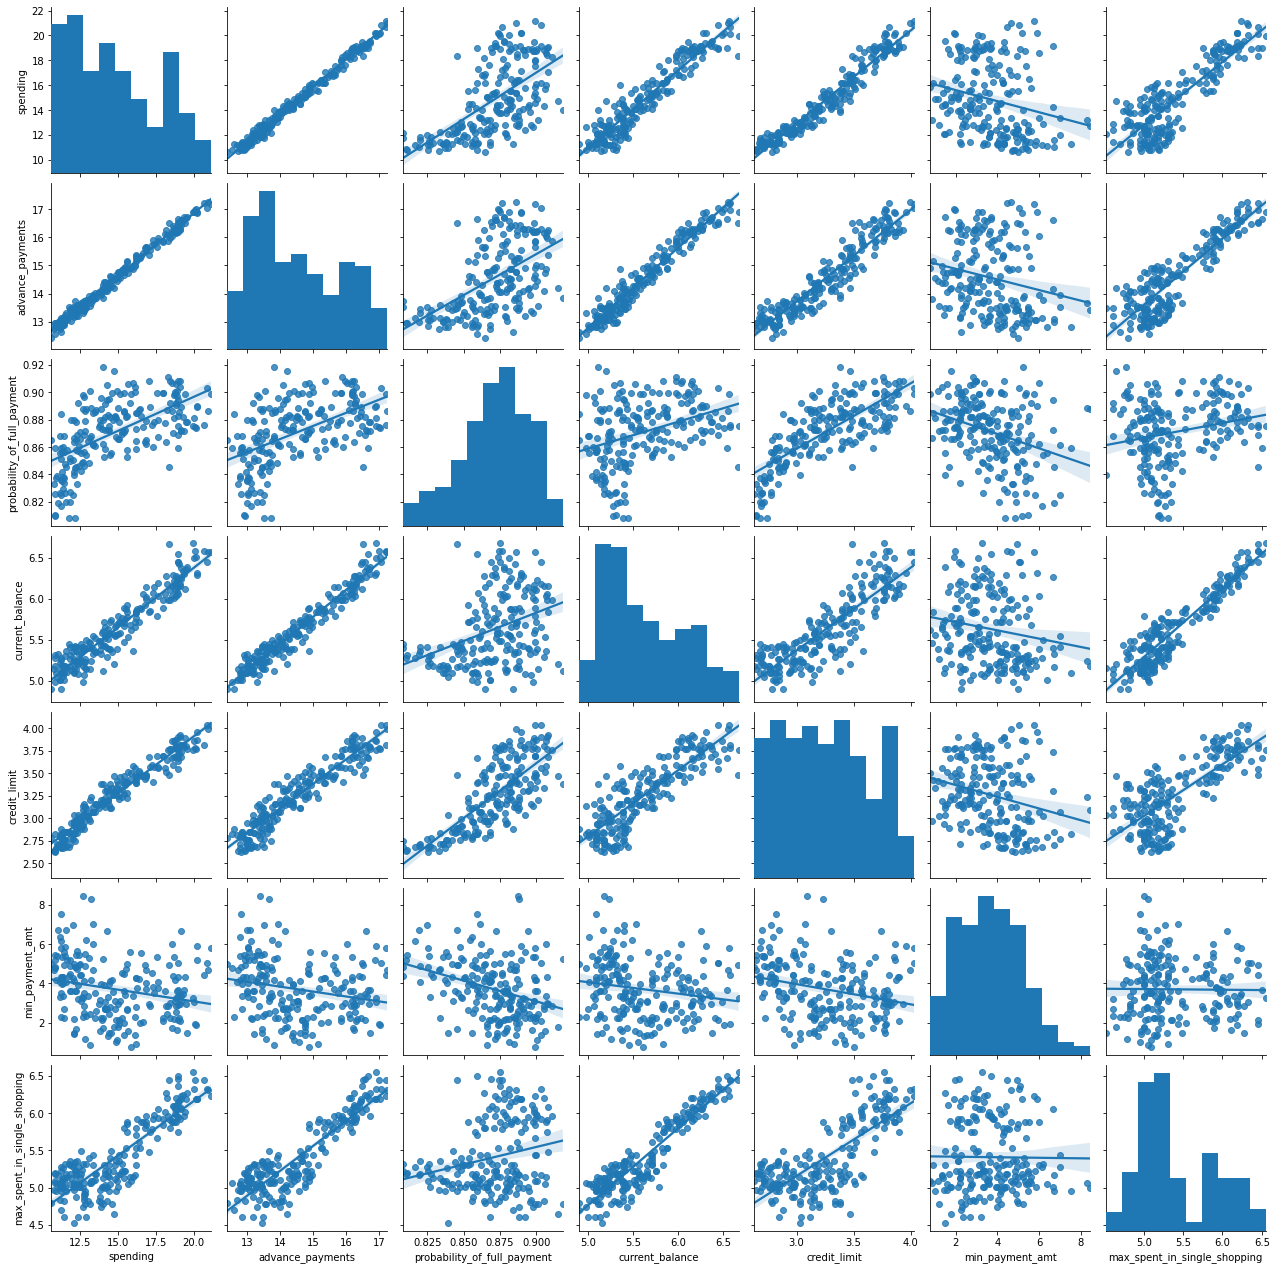

In [19]:
#Bivariate analysis - Pair plot
sns.pairplot(data_hc_frame, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [20]:
#Z-score scaling
data_hc_scaled = data_hc_frame.apply(zscore)
data_hc_scaled.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
5,-0.739821,-0.882135,0.695769,-1.007977,-0.444794,3.170590,-0.832274
6,-0.974080,-0.943539,-0.878059,-0.630155,-1.190520,0.380540,-0.204099
7,-0.381541,-0.390903,0.144293,-0.331518,-0.383756,-0.512143,-1.189192
8,1.144591,1.305384,-0.309615,1.453520,0.672468,-0.564811,1.764048
9,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156


In [21]:
#5 point summary
data_hc_scaled.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [22]:
#link method
wardlink = linkage(data_hc_scaled, method = 'ward')

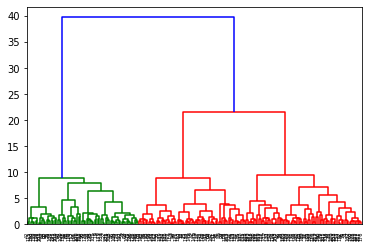

In [23]:
dend = dendrogram(wardlink)

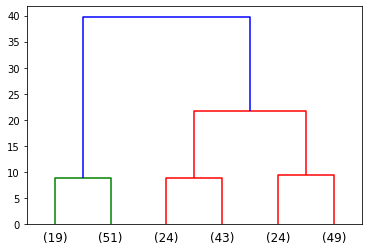

In [24]:
#dendogram creation
dend = dendrogram(wardlink,truncate_mode='lastp',p = 6,)

In [25]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [26]:
clusters = fcluster(wardlink, 15, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [27]:
data_hc_frame['clusters'] = clusters

In [28]:
data_hc_frame

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1


In [29]:
#adding the result to a csv file
data_hc_frame.to_csv('hc_cluster_result.csv')

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [30]:
#z-score applied
data_kmeans_scaled = data_kmeans_frame.apply(zscore)
data_kmeans_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [31]:
#wss score check
wss =[] 

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_kmeans_scaled)
    wss.append(KM.inertia_)

print("The values of WSS score from 1 to 10 clusters are:\n",wss)

The values of WSS score from 1 to 10 clusters are:
 [1469.9999999999998, 659.171754487041, 430.6589731513006, 371.5811909715524, 326.36542859794463, 291.8658741861279, 267.6947300343073, 241.183442809814, 222.50615530705176, 206.26895055304064]


In [32]:
y = [1469.9999999999998, 659.171754487041, 430.6589731513006, 371.1846125351018, 326.36760226583755, 295.0311115041298, 263.31630849188286, 239.99907463153, 222.64284565367828, 207.65354330246717]

x = range(1, len(y)+1)

In [33]:
from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print("The number of clusters identified: ",kn.knee)

The number of clusters identified:  3


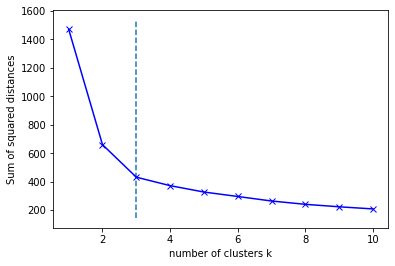

In [34]:
import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [35]:
#applying the result in the algorithm
k_means_3 = KMeans(n_clusters = 3)
k_means_3.fit(data_kmeans_scaled)
labels = k_means_3.labels_

In [36]:
data_kmeans_frame["clusters"] = labels
data_kmeans_frame.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [37]:
sil_width = silhouette_samples(data_kmeans_frame,labels)

In [38]:
print("The Silhoutte score for number of clusters as 3 is:", silhouette_score(data_kmeans_scaled,labels))

The Silhoutte score for number of clusters as 3 is: 0.4007270552751299


In [39]:
data_kmeans_frame["sil_width"] = sil_width
data_kmeans_frame.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.638875
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.347235
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.681262
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.660206
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.469383


In [40]:
data_kmeans_frame

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.638875
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.347235
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.681262
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.660206
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.469383
...,...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,2,0.381328
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1,0.304780
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2,0.596038
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,2,0.341227


In [41]:
#adding the result to a csv file
data_kmeans_frame.to_csv('kmeans_cluster_result.csv')

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

For Heirarchical Clustering:

In [42]:
#Grouning the results based on cluster values
grouped = data_hc_frame.groupby(data_hc_frame.clusters)

data_hc_cluster_1 = grouped.get_group(1)
data_hc_cluster_2 = grouped.get_group(2)
data_hc_cluster_3 = grouped.get_group(3)

In [43]:
data_hc_cluster_3

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3
11,14.09,14.41,0.8529,5.717,3.186,3.920,5.299,3
14,12.10,13.15,0.8793,5.105,2.941,2.201,5.056,3
16,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,3
...,...,...,...,...,...,...,...,...
200,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,3
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309,3
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3


In [44]:
data_hc_cluster_2

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
12,12.15,13.45,0.8443,5.417,2.837,3.638,5.338,2
...,...,...,...,...,...,...,...,...
189,11.75,13.52,0.8082,5.444,2.678,4.378,5.310,2
192,12.26,13.60,0.8333,5.408,2.833,4.756,5.360,2
197,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,2
199,12.01,13.52,0.8249,5.405,2.776,6.992,5.270,2


In [45]:
data_hc_cluster_1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
10,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,1
...,...,...,...,...,...,...,...,...
198,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,1
201,17.08,15.38,0.9079,5.832,3.683,2.956,5.484,1
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,1
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1


In [46]:
data_hc_cluster_3.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,3.0
std,1.230930,0.600399,0.017373,0.240882,0.179454,1.118413,0.275904,0.0
min,11.230000,12.630000,0.833500,4.902000,2.719000,0.765100,4.519000,3.0
25%,13.500000,13.850000,0.868000,5.351000,3.129000,1.791000,4.872000,3.0
50%,14.330000,14.280000,0.879600,5.504000,3.221000,2.504000,5.097000,3.0
75%,15.030000,14.670000,0.892300,5.658000,3.371000,3.136000,5.220000,3.0
max,16.630000,15.460000,0.918300,6.053000,3.582000,6.685000,5.879000,3.0


In [47]:
data_hc_cluster_2.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,2.0
std,0.735848,0.353348,0.020311,0.136087,0.142565,1.170672,0.156953,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,3.082000,4.794000,2.0
25%,11.250000,13.000000,0.834400,5.142500,2.731000,4.117000,5.002000,2.0
50%,11.830000,13.270000,0.849100,5.236000,2.833000,4.857000,5.091000,2.0
75%,12.450000,13.520000,0.861100,5.329000,2.967000,5.470500,5.247000,2.0
max,13.370000,13.950000,0.888300,5.541000,3.232000,8.456000,5.491000,2.0


In [48]:
data_hc_cluster_1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.0
std,1.381233,0.599277,0.014767,0.245926,0.174909,1.208271,0.251132,0.0
min,15.380000,14.860000,0.845200,5.709000,3.268000,1.472000,5.443000,1.0
25%,17.330000,15.737500,0.874700,5.979250,3.554250,2.845500,5.877000,1.0
50%,18.720000,16.210000,0.883950,6.148500,3.693500,3.629000,5.981500,1.0
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.459250,6.187750,1.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,1.0


In [49]:
#pivot table with concentration on mean values
aggdata=data_hc_frame.iloc[:,0:8].groupby('clusters').mean()
aggdata['Freq']=data_hc_frame.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


For KMeans Clustering:

In [50]:
grouped = data_kmeans_frame.groupby(data_kmeans_frame.clusters)

data_kmeans_frame_cluster_1 = grouped.get_group(0)
data_kmeans_frame_cluster_2 = grouped.get_group(1)
data_kmeans_frame_cluster_3 = grouped.get_group(2)

In [51]:
data_kmeans_frame_cluster_1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.660206
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,0,0.390004
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,0,0.628996
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0,0.659001
12,12.15,13.45,0.8443,5.417,2.837,3.638,5.338,0,0.517601
...,...,...,...,...,...,...,...,...,...
190,11.23,12.63,0.8840,4.902,2.879,2.269,4.703,0,0.348478
192,12.26,13.60,0.8333,5.408,2.833,4.756,5.360,0,0.619306
197,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,0,0.620915
199,12.01,13.52,0.8249,5.405,2.776,6.992,5.270,0,0.531860


In [52]:
data_kmeans_frame_cluster_2

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.638875
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.681262
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.469383
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,0.604744
10,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,1,0.521762
...,...,...,...,...,...,...,...,...,...
196,18.76,16.20,0.8984,6.172,3.796,3.120,6.053,1,0.666253
198,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,1,0.678866
201,17.08,15.38,0.9079,5.832,3.683,2.956,5.484,1,0.270509
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,1,0.114935


In [53]:
data_kmeans_frame_cluster_3

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.347235
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2,0.529389
11,14.09,14.41,0.8529,5.717,3.186,3.920,5.299,2,0.455747
14,12.10,13.15,0.8793,5.105,2.941,2.201,5.056,2,0.132269
16,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2,0.348578
...,...,...,...,...,...,...,...,...,...
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309,2,0.623706
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,2,0.381328
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2,0.596038
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,2,0.341227


In [54]:
data_kmeans_frame_cluster_1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000
mean,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,0.0,0.553334
std,0.714801,0.355208,0.019953,0.141795,0.138689,1.354711,0.184012,0.0,0.133895
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.502000,4.519000,0.0,0.072141
25%,11.255000,12.992500,0.835000,5.139250,2.738500,4.032250,5.001000,0.0,0.517222
50%,11.825000,13.250000,0.848600,5.225000,2.836500,4.799000,5.089000,0.0,0.611598
75%,12.395000,13.482500,0.861475,5.337250,2.967000,5.463750,5.223500,0.0,0.650346
max,13.340000,13.950000,0.888300,5.541000,3.232000,8.456000,5.491000,0.0,0.682199


In [55]:
data_kmeans_frame_cluster_2.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.000000
mean,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.0,0.510893
std,1.277122,0.546439,0.014917,0.237807,0.166014,1.211052,0.229566,0.0,0.190047
min,15.560000,14.890000,0.845200,5.718000,3.387000,1.472000,5.484000,1.0,-0.154060
25%,17.590000,15.855000,0.874650,6.011500,3.564500,2.848000,5.879000,1.0,0.476973
50%,18.750000,16.230000,0.882900,6.153000,3.719000,3.619000,6.009000,1.0,0.577328
75%,19.145000,16.580000,0.898050,6.328000,3.808000,4.421000,6.192500,1.0,0.640503
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,1.0,0.681262


In [56]:
data_kmeans_frame_cluster_3.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000
mean,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.0,0.450453
std,1.056513,0.525706,0.015502,0.225266,0.154766,1.176440,0.269558,0.0,0.170257
min,12.080000,13.150000,0.852700,4.984000,2.936000,0.765100,4.605000,2.0,-0.038271
25%,13.820000,14.030000,0.871300,5.380000,3.155000,1.951000,4.958500,2.0,0.344884
50%,14.430000,14.390000,0.881900,5.541000,3.258000,2.640000,5.132000,2.0,0.489173
75%,15.260000,14.760000,0.893350,5.689500,3.378000,3.332000,5.263500,2.0,0.598656
max,16.440000,15.270000,0.918300,5.920000,3.582000,6.685000,5.879000,2.0,0.651159


In [57]:
data_kmeans_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
 7   clusters                      210 non-null    int32  
 8   sil_width                     210 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 14.1 KB


In [58]:
aggdata_1=data_kmeans_frame.iloc[:,0:8].groupby('clusters').mean()
aggdata_1['Freq']=data_kmeans_frame.clusters.value_counts().sort_index()
aggdata_1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
